In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly as px
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [14]:
fish_data =  pd.read_csv("fish.csv")

In [15]:
fish_data.shape

(159, 7)

In [16]:
fish_data.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [17]:
fish_data.head

<bound method NDFrame.head of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [18]:
fish_data.tail

<bound method NDFrame.tail of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [19]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [20]:
fish_data.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [21]:
fish_data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [22]:
fish_data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

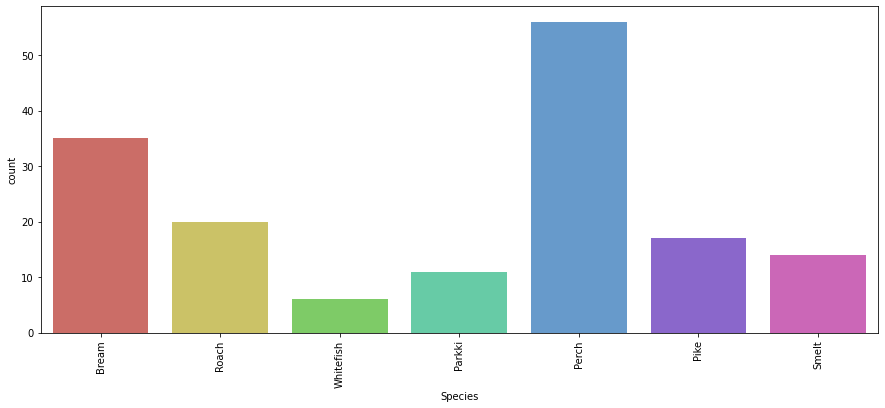

In [31]:
plt.figure(figsize=(15,6))
sns.countplot('Species', data = fish_data,palette='hls')
plt.xticks(rotation = 90)
plt.show()

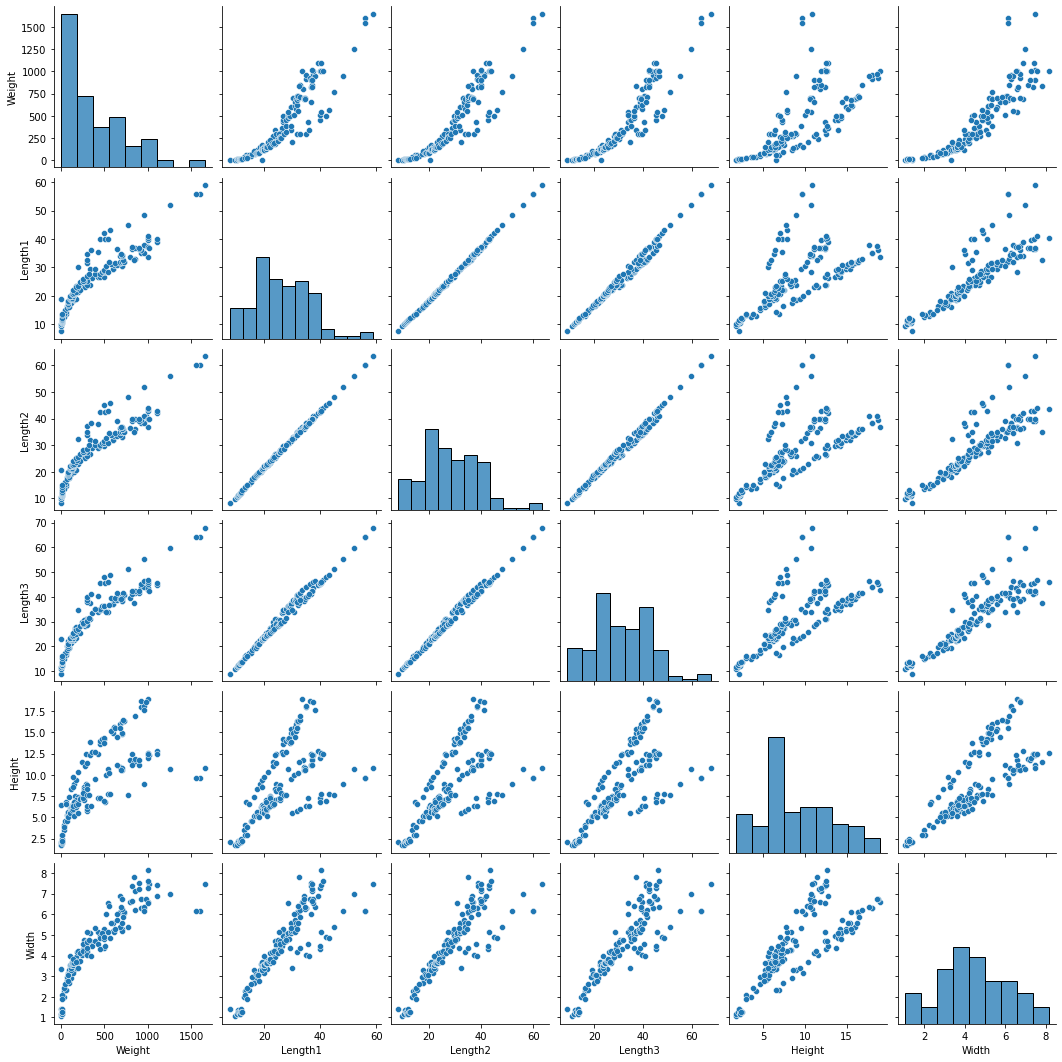

In [38]:
sns.pairplot(fish_data)

In [39]:
#x defines from which column the plot has to be made and color defines how to differentiate the bars
fig = px.hist_frame(fish_data , x= 'Species',
                   color='Species')
fig.show()

In [40]:
fish_data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


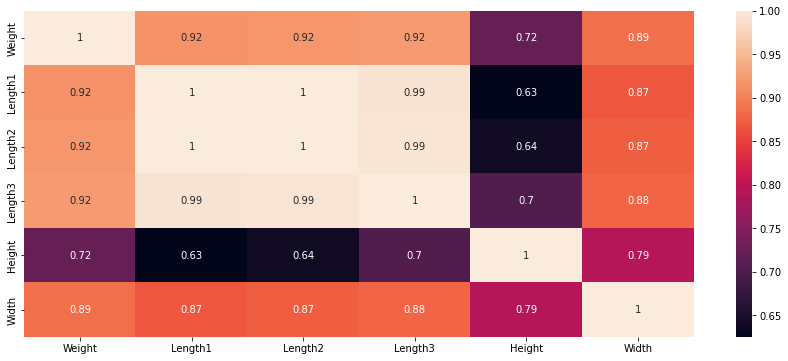

In [41]:
#Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(fish_data.corr(), annot =True)
plt.show()

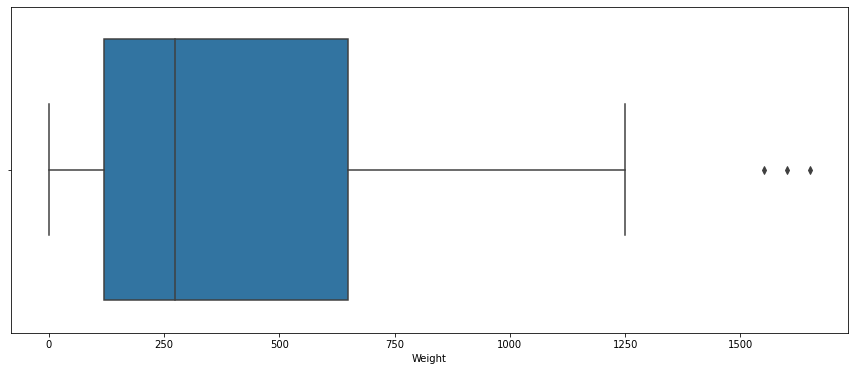

In [46]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Weight'])
#plt.xticks(rotation = 90)
plt.show()

In [55]:
#breaks the data into 
fish_weight = fish_data["Weight"]
Q3= fish_weight.quantile(0.75)
Q1= fish_weight.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)




In [56]:
#compares
weight_outliers = fish_weight[(fish_weight <lower_limit)|(fish_weight >upper_limit)]
weight_outliers


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

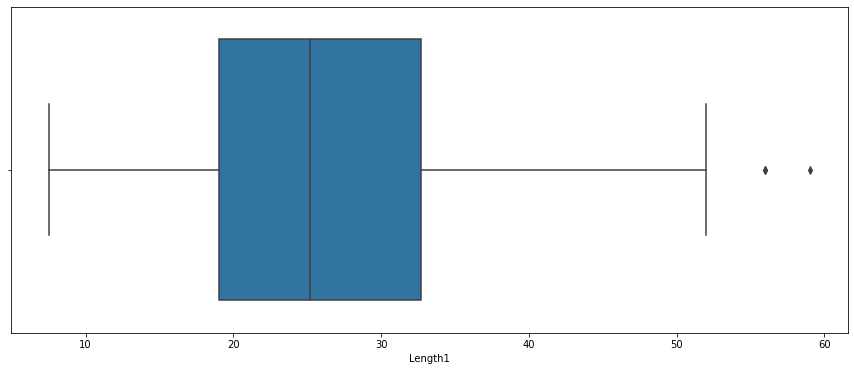

In [58]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length1'])
#plt.xticks(rotation = 90)
plt.show()

In [60]:
#breaks the data into 
fish_length = fish_data["Length1"]
Q3= fish_length.quantile(0.75)
Q1= fish_length.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [61]:
#compares
weight_outliers = fish_length[(fish_length <lower_limit)|(fish_length >upper_limit)]
weight_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

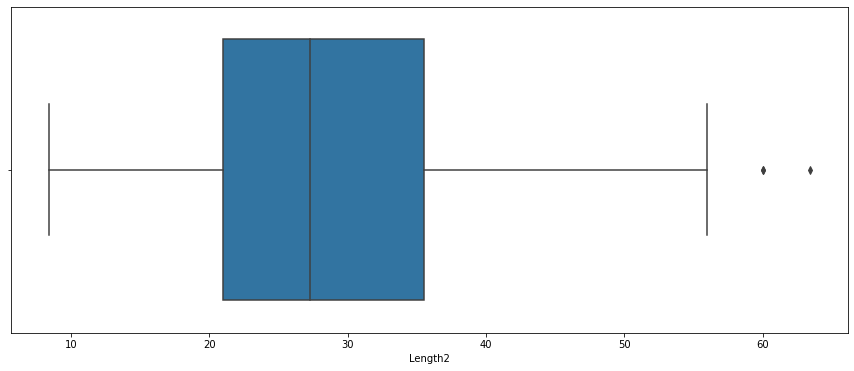

In [62]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length2'])
#plt.xticks(rotation = 90)
plt.show()

In [63]:
#breaks the data into 
fish_length2 = fish_data["Length2"]
Q3= fish_length2.quantile(0.75)
Q1= fish_length2.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [64]:
weight_outliers = fish_length2[(fish_length2 <lower_limit)|(fish_length2 >upper_limit)]
weight_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

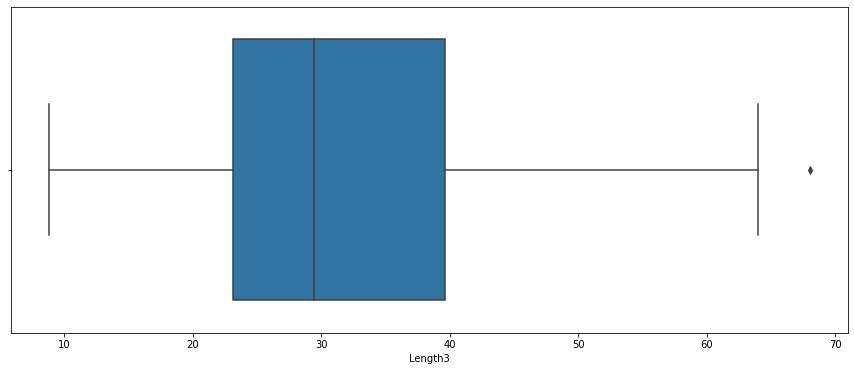

In [71]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Length3'])
#plt.xticks(rotation = 90)
plt.show()

In [68]:
#breaks the data into 
fish_length3 = fish_data["Length3"]
Q3= fish_length3.quantile(0.75)
Q1= fish_length3.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [69]:
weight_outliers = fish_length3[(fish_length3 <lower_limit)|(fish_length3 >upper_limit)]
weight_outliers

144    68.0
Name: Length3, dtype: float64

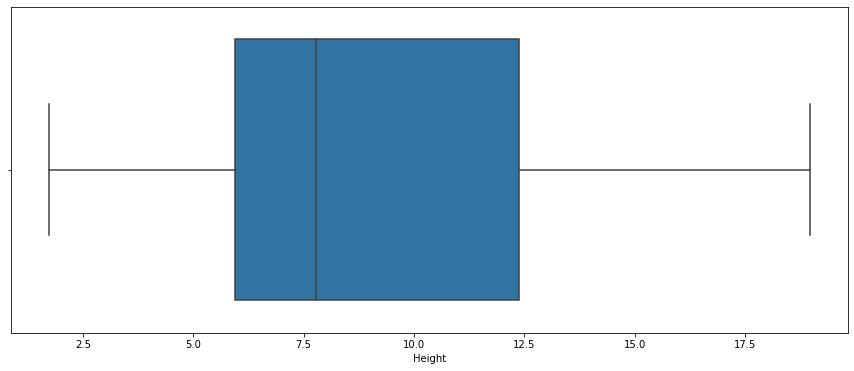

In [72]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Height'])
#plt.xticks(rotation = 90)
plt.show()

In [74]:
#breaks the data into 
fish_height = fish_data["Height"]
Q3= fish_height.quantile(0.75)
Q1= fish_height.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [76]:
height_outliers = fish_height[(fish_height <lower_limit)|(fish_height >upper_limit)]
height_outliers

Series([], Name: Height, dtype: float64)

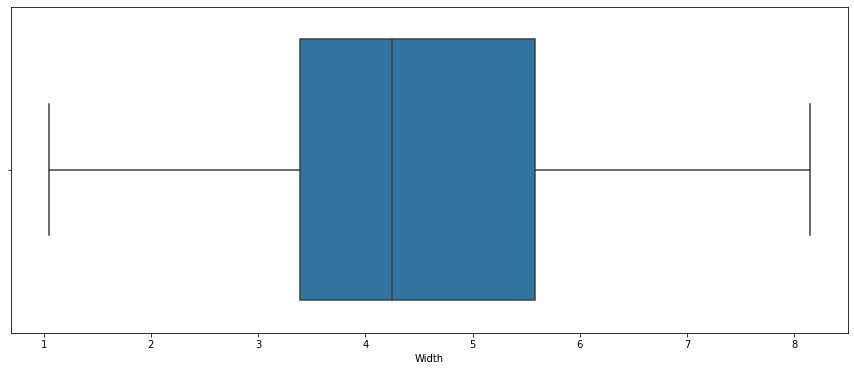

In [77]:
#statistical info
plt.figure(figsize=(15,6))
sns.boxplot(fish_data['Width'])
#plt.xticks(rotation = 90)
plt.show()

In [78]:
#breaks the data into 
fish_width = fish_data["Width"]
Q3= fish_width.quantile(0.75)
Q1= fish_width.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [79]:
width_outliers = fish_width[(fish_width <lower_limit)|(fish_width >upper_limit)]
width_outliers

Series([], Name: Width, dtype: float64)

In [80]:
fish_data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [82]:
fish_data_new = fish_data.drop([142,143,144])

In [84]:
fish_data_new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [108]:
scaler = StandardScaler()

In [109]:
scaling_columns= ["Length1","Length2","Length3",
                  "Height","Weight","Width"]
fish_data_new[scaling_columns] = scaler.fit_transform(fish_data_new[scaling_columns])
fish_data_new.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,2.250000,-1.708035e-17,1.281027e-17,-3.700743e-17,1.138690e-17,-4.554761e-17,-1.138690e-17
std,1.717556,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,0.000000,-1.177998e+00,-1.997257e+00,-1.986079e+00,-2.042126e+00,-1.675635e+00,-1.996688e+00
25%,1.000000,-8.012570e-01,-7.321794e-01,-6.952556e-01,-7.078263e-01,-7.004973e-01,-6.036162e-01
50%,2.000000,-3.271912e-01,-7.213903e-02,-1.061895e-01,-1.239237e-01,-3.023653e-01,-7.944425e-02
75%,4.000000,7.449512e-01,7.116589e-01,7.389923e-01,8.304874e-01,7.951438e-01,6.291357e-01
max,6.000000,2.746388e+00,2.898043e+00,2.890364e+00,2.732275e+00,2.321310e+00,2.259561e+00


In [110]:
label_encoder = LabelEncoder()

In [111]:
fish_data_new['Species'] = label_encoder.fit_transform(fish_data_new['Species'].values)

In [115]:
data_cleaned = fish_data_new.drop("Weight", axis=1)
y= fish_data_new['Weight']

In [123]:
x_train,x_test,y_train,y_test=train_test_split(data_cleaned,y,test_size = 0.2,random_state=0)

In [124]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [125]:
y_pred = model.predict(x_test)

In [126]:
print('Training Accuracy : ',model.score(x_train,y_train))
print('Testing Accuracy : ',model.score(x_test,y_test))

Training Accuracy :  0.9946451548760412
Testing Accuracy :  0.9670320367630965


In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
model1 = DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [138]:
print('Training Accuracy : ',model1.score(x_train,y_train))
print('Testing Accuracy : ',model1.score(x_test,y_test))

Training Accuracy :  1.0
Testing Accuracy :  0.9183147471318827


In [144]:
from sklearn.linear_model import LinearRegression

In [148]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [150]:
print('Training Accuracy : ',model3.score(x_train,y_train))
print('Testing Accuracy : ',model3.score(x_test,y_test))

Training Accuracy :  0.912829500351841
Testing Accuracy :  0.9170173419704403


In [152]:
import xgboost as xgb
xgb1 = xgb.XGBRegressor()

In [154]:
xgb1.fit(x_train,y_train)
xgb_pred = xgb1.predict(x_test)

[07:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [157]:
print('Training Accuracy : ',xgb1.score(x_train,y_train))
print('Testing Accuracy : ',xgb1.score(x_test,y_test))

Training Accuracy :  0.9984364302739234
Testing Accuracy :  0.9648697707355631


In [158]:
xgb1.save_model("model.json")

In [161]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 9.9 MB/s 
     |████████████████████████████████| 164 kB 34.1 MB/s 
     |████████████████████████████████| 232 kB 71.2 MB/s 
     |████████████████████████████████| 111 kB 71.7 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 4.3 MB 60.9 MB/s 
     |████████████████████████████████| 181 kB 59.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 133 kB 59.9 MB/s 
     |████████████████████████████████| 793 kB 53.0 MB/s 
     |████████████████████████████████| 132 kB 54.7 MB/s 
     |████████████████████████████████| 428 kB 52.9 MB/s 
     |████████████████████████████████| 381 kB 50.4 MB/s 
     |████████████████████████████████| 51 kB 9.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=bd6d10b3777

In [168]:
import streamlit as st

In [167]:
st.header("Fish Weight Prediction App")
st.text_input("Enter your name", key = "name")

''

In [171]:
np.save('classes.npy',label_encoder.classes_)

In [172]:
label_encoder.classes_= np.load('classes.npy', allow_pickle=True)

In [ ]:
xfb_best.load_model()

NameError: ignored